In [2]:

## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

In [3]:
df = pd.read_csv(r"Dataset_2.csv")

In [4]:
df.columns

Index(['State_list', 'County_list', 'City_list', 'Street_list', 'Zipcode_list',
       'Property_Type_list', 'Status_list', 'Price_list', 'Year_Built_list',
       'Beds_list', 'Baths_list', 'Square_Footage_list', 'School_Rating_list',
       'Walk_Score_list', 'Bike_Score_list', 'Redfin_Estimate_list', 'City'],
      dtype='object')

In [7]:
df = df[['State_list', 'County_list', 'City_list', 'Street_list', 'Zipcode_list',
       'Property_Type_list', 'Status_list', 'Price_list', 'Year_Built_list',
       'Beds_list', 'Baths_list', 'Square_Footage_list', 'School_Rating_list',
       'Walk_Score_list', 'Bike_Score_list', 'Redfin_Estimate_list', 'City']]

In [8]:
df.head()


,State_list,County_list,City_list,Street_list,Zipcode_list,Property_Type_list,Status_list,Price_list,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Walk_Score_list,Bike_Score_list,Redfin_Estimate_list,City
0,Ca,Alameda-county,Union City,3138 san angelo way,94587,Single family residential,New,1325000.0,1968,4.0,2.0,1530.0,6,74,56.0,1331626.0,Union city
1,Ca,Alameda-county,Castro Valley,16999 grovenor,94546,Single family residential,New,1399000.0,1960,3.0,2.5,1894.0,9,19,18.0,1406923.0,Castro valley
2,Ca,Alameda-county,Newark,36296 cedar blvd,94560,Single family residential,New,1189000.0,1971,4.0,2.0,1453.0,7,59,45.0,1183034.0,Newark
3,Ca,Alameda-county,Castro Valley,3641 pine st,94546,Single family residential,New,685000.0,1948,2.0,1.0,825.0,9,77,66.0,686215.0,Castro valley
4,Ca,Alameda-county,Hayward,29867 mission blvd,94544,Townhouse,New,934676.0,2023,3.0,3.0,1940.0,2,66,54.0,933925.0,Hayward


In [9]:
df.value_counts()

State_list  County_list          City_list       Street_list                 Zipcode_list  Property_Type_list         Status_list  Price_list  Year_Built_list  Beds_list  Baths_list  Square_Footage_list  School_Rating_list  Walk_Score_list  Bike_Score_list  Redfin_Estimate_list  City          
Ca          Alameda-county       Alameda         1201 saint charles st       94501         Single family residential  New          1795000.0   1958             4.0        3.0         1901.0               7                   60               75.0             0.0                   Alameda           1
            San-mateo-county     SAN CARLOS      1110 orange ave             94070         Single family home         Active       1698000.0   1947             3.0        1.5         1250.0               9                   71               65.0             1707050.0             San carlos        1
                                 SAN BRUNO       3191 fasman dr              94066         Single family 

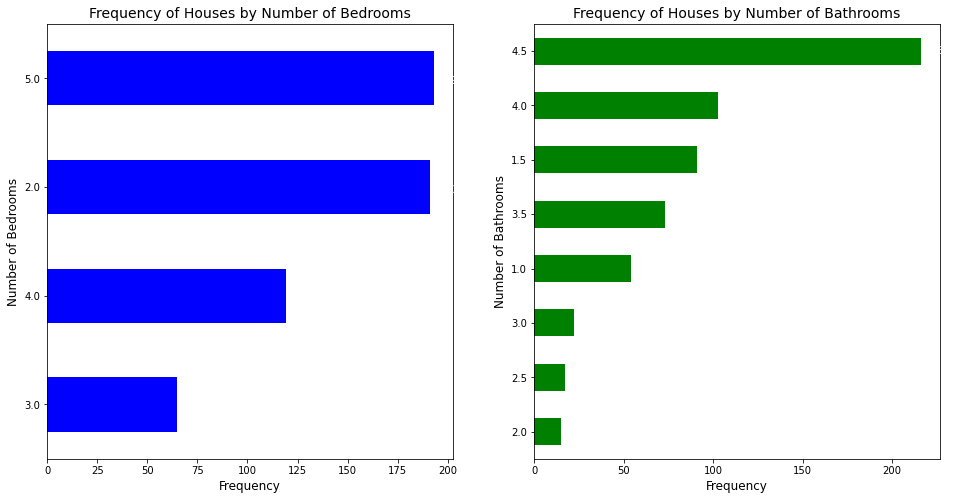

In [10]:
#Beds & Bath
fig = plt.figure(figsize = (16,8))

#Subplot 1: Frequency of houses based on number of bedrooms
ax1 = fig.add_subplot(1,2,1)
x1 = "Beds_list"
ax1 = df[x1].value_counts().sort_values().plot(kind="barh", color="blue")
totals= []
for i in ax1.patches:
    totals.append(i.get_width())
    total = sum(totals)
for i in ax1.patches:
    ax1.text(i.get_width()+.3, i.get_y()+.20,
str(round((i.get_width()/total)*100, 2))+'%',
fontsize=10, color='white')
ax1.set_xlabel("Frequency", fontsize=12)
ax1.set_ylabel("Number of Bedrooms", fontsize=12)
ax1.set_title("Frequency of Houses by Number of Bedrooms", fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.set_yticklabels(ax1.get_yticklabels()[::-1]) # reverse the order of the y-axis tick labels

#Subplot 2: Frequency of houses based on number of bathrooms
ax2 = fig.add_subplot(1,2,2)
x2 = "Baths_list"
ax2 = df[x2].value_counts().sort_values().plot(kind="barh", color="green")
totals= []
for i in ax2.patches:
    totals.append(i.get_width())
    total = sum(totals)
for i in ax2.patches:
    ax2.text(i.get_width()+.3, i.get_y()+.20,
str(round((i.get_width()/total)*100, 2))+'%',
fontsize=10, color='white')
ax2.set_xlabel("Frequency", fontsize=12)
ax2.set_ylabel("Number of Bathrooms", fontsize=12)
ax2.set_title("Frequency of Houses by Number of Bathrooms", fontsize=14)
ax2.tick_params(axis='x', labelsize=10)
ax2.set_yticklabels(ax2.get_yticklabels()[::-1]) # reverse the order of the y-axis tick labels

plt.show()








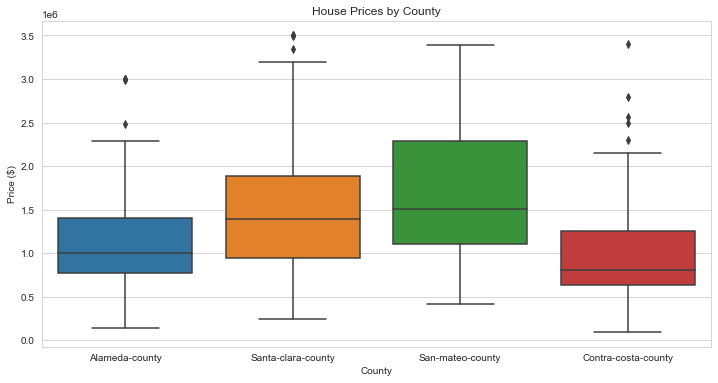

In [11]:

# prices by county
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='County_list', y='Price_list', data=df)
plt.xlabel('County')
plt.ylabel('Price ($)')
plt.title('House Prices by County')
plt.show()



In [14]:
df['per square_feet_price'] = (df['Price_list']/df['Square_Footage_list']).round(1)

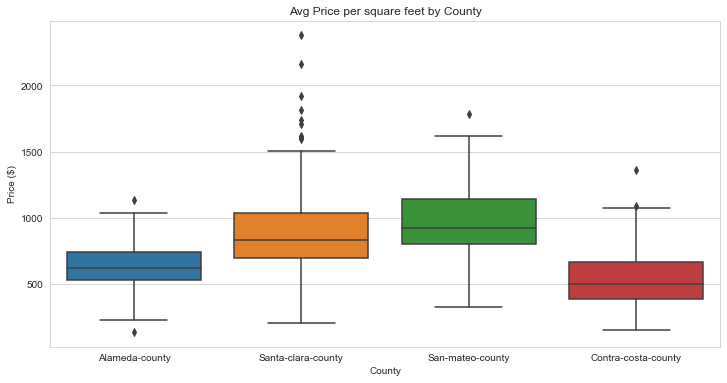

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='County_list', y='per square_feet_price', data=df)
plt.xlabel('County')
plt.ylabel('Price ($)')
plt.title('Avg Price per square feet by County')
plt.show()

In [16]:

# Grouping the data by City and calculating the mean price per square feet
au = df[df['per square_feet_price'].notnull()].groupby(by="City_list")['per square_feet_price'].mean().round(2)

# Converting the resulting Series to a DataFrame
au = pd.DataFrame(au)


In [17]:
# Create a DataFrame of average price per square feet by city
avg_price_per_sqft = df[df['per square_feet_price'].notnull()].groupby(by="City_list")
avg_price_per_sqft = avg_price_per_sqft['per square_feet_price'].mean().round(2)
avg_price_per_sqft = pd.DataFrame(avg_price_per_sqft)

# Get the top 10 and bottom 10 cities by price per square feet
top10_cities = pd.DataFrame(avg_price_per_sqft.sort_values(by='per square_feet_price', ascending=False).head(10))
top10_cities['Stack'] = 'Top 10'
print(top10_cities)
bottom10_cities = pd.DataFrame(avg_price_per_sqft.sort_values(by='per square_feet_price', ascending=True).head(10))
bottom10_cities['Stack'] = 'Bottom 10'
print(bottom10_cities)

                per square_feet_price   Stack
City_list                                    
PALO ALTO                     1963.90  Top 10
LOS ALTOS                     1812.40  Top 10
MENLO PARK                    1452.96  Top 10
CUPERTINO                     1438.65  Top 10
BURLINGAME                    1280.00  Top 10
Millbrae                      1249.30  Top 10
PORTOLA VALLEY                1221.90  Top 10
San Mateo                     1173.80  Top 10
LOS GATOS                     1125.19  Top 10
SARATOGA                      1113.45  Top 10
               per square_feet_price      Stack
City_list                                      
San Pablo                     276.55  Bottom 10
Pittsburg                     302.45  Bottom 10
Antioch                       327.34  Bottom 10
Discovery Bay                 336.45  Bottom 10
Oakley                        346.60  Bottom 10
Bethel Island                 363.05  Bottom 10
Bay Point                     365.55  Bottom 10
HERCULES        

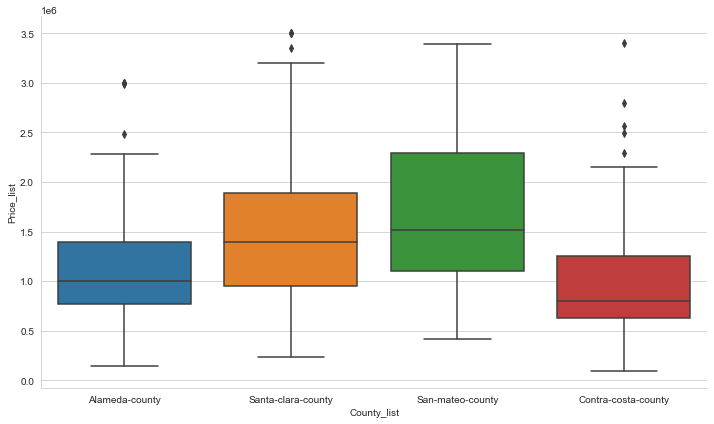

In [18]:
sns.catplot(x="County_list", y="Price_list", data=df, kind="box", height=6, aspect=1.67)



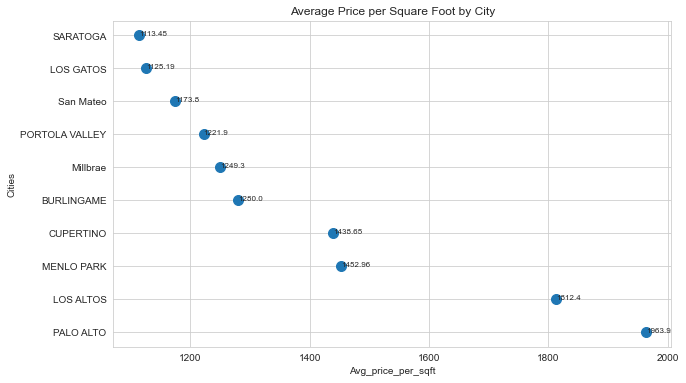

In [19]:
# avg_price_per_square_feet in cali
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
ax.scatter(x=top10_cities['per square_feet_price'], y=top10_cities.index, s=100)

# Set labels and title
ax.set_xlabel("Avg_price_per_sqft")
ax.set_ylabel("Cities")
ax.set_title('Average Price per Square Foot by City')

# Add annotation to each point
for i, txt in enumerate(top10_cities['per square_feet_price'].round(2)):
    ax.annotate(txt, (top10_cities['per square_feet_price'][i]+0.2, top10_cities.index[i]), fontsize=8)

plt.show()



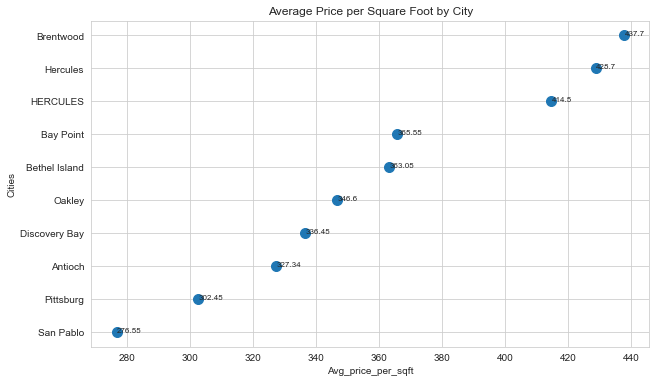

In [20]:
# avg_price_per_square_feet in cali
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
ax.scatter(x=bottom10_cities['per square_feet_price'], y=bottom10_cities.index, s=100)

# Set labels and title
ax.set_xlabel("Avg_price_per_sqft")
ax.set_ylabel("Cities")
ax.set_title('Average Price per Square Foot by City')

# Add annotation to each point
for i, txt in enumerate(bottom10_cities['per square_feet_price'].round(2)):
    ax.annotate(txt, (bottom10_cities['per square_feet_price'][i]+0.2, bottom10_cities.index[i]), fontsize=8)

plt.show()

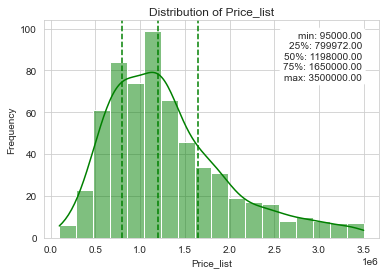

In [22]:
variable_name = "Price_list"

# Create the plot
fig, ax = plt.subplots()
title = f"Distribution of {variable_name}"
ax.title.set_text(title)

# Fill missing values with the median, not the mean
variable = df[variable_name].fillna(df[variable_name].median())

# Plot the histogram and quartile lines in green
sns.histplot(variable, kde=True, color='green')
des = variable.describe()
for q in ["25%", "50%", "75%"]:
    ax.axvline(des[q], ls='--', color='green')

# Format and add the summary statistics text box
box = f"min: {des['min']:.2f}\n25%: {des['25%']:.2f}\n50%: {des['50%']:.2f}\n75%: {des['75%']:.2f}\nmax: {des['max']:.2f}"
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

# Add axis labels
ax.set_xlabel(variable_name)
ax.set_ylabel("Frequency")

plt.show()

In [23]:
# create Property_Category column based on Property_Type
df['Property_Category'] = df['Property_Type_list'].apply(lambda x: 'Single' if x in ['Single family','Single family home', 'Single family residence', 'Single family residential', 'Single-wide mobile home'] else ('Residential' if x in ['Residential', 'Residential, townhouse', 'Townhouse'] else ('Condo' if x in ['Cabin', 'Co-op', 'Condo', 'Condo/co-op'] else 'Others')))


In [24]:
df.head()

,State_list,County_list,City_list,Street_list,Zipcode_list,Property_Type_list,Status_list,Price_list,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Walk_Score_list,Bike_Score_list,Redfin_Estimate_list,City,per square_feet_price,Property_Category
0,Ca,Alameda-county,Union City,3138 san angelo way,94587,Single family residential,New,1325000.0,1968,4.0,2.0,1530.0,6,74,56.0,1331626.0,Union city,866.0,Single
1,Ca,Alameda-county,Castro Valley,16999 grovenor,94546,Single family residential,New,1399000.0,1960,3.0,2.5,1894.0,9,19,18.0,1406923.0,Castro valley,738.6,Single
2,Ca,Alameda-county,Newark,36296 cedar blvd,94560,Single family residential,New,1189000.0,1971,4.0,2.0,1453.0,7,59,45.0,1183034.0,Newark,818.3,Single
3,Ca,Alameda-county,Castro Valley,3641 pine st,94546,Single family residential,New,685000.0,1948,2.0,1.0,825.0,9,77,66.0,686215.0,Castro valley,830.3,Single
4,Ca,Alameda-county,Hayward,29867 mission blvd,94544,Townhouse,New,934676.0,2023,3.0,3.0,1940.0,2,66,54.0,933925.0,Hayward,481.8,Residential


In [25]:
bu = pd.crosstab(df['County_list'],df['Property_Category'])
bu

Property_Category,Condo,Others,Residential,Single
County_list,,,,
Alameda-county,29,14,16,93
Contra-costa-county,29,7,7,112
San-mateo-county,22,12,9,109
Santa-clara-county,30,7,17,103


(array([0, 1, 2]),
 [Text(0, 0, 'Alameda-county'),
  Text(1, 0, 'Contra-costa-county'),
  Text(2, 0, 'San-mateo-county')])

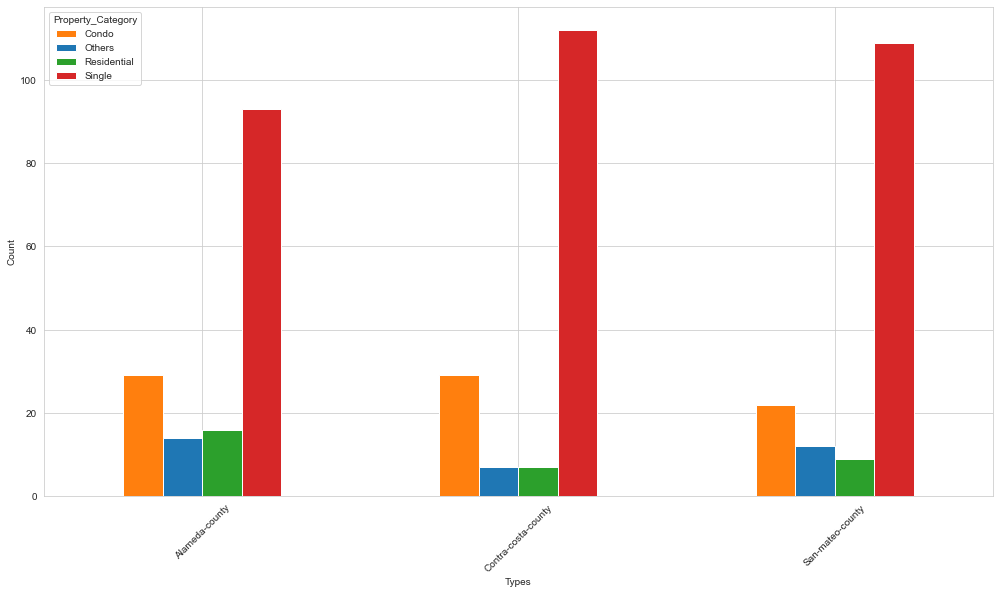

In [26]:
x = ['Alameda-county', 'Contra-costa-county', 'San-mateo-county']
y = ['Condo','Others','Residential','Single']
colors = ['#ff7f0e','#1f77b4','#2ca02c','#d62728']
bu.loc[x, y].plot.bar(figsize=(17,9),color=colors)
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [27]:
statusCategory = []
for i in df['Status_list']:
    if i in ['Price change','Active']:
        statusCategory.append('Active')
    elif i in ['New','Coming soon']:
        statusCategory.append('Coming soon')
    else:
        statusCategory.append('Pending')
df['Status_Category'] = statusCategory
statusDesc = pd.crosstab(df['Status_Category'],df['County_list'])
statusDesc

County_list,Alameda-county,Contra-costa-county,San-mateo-county,Santa-clara-county
Status_Category,,,,
Active,35,25,150,142
Coming soon,117,129,2,15
Pending,0,1,0,0


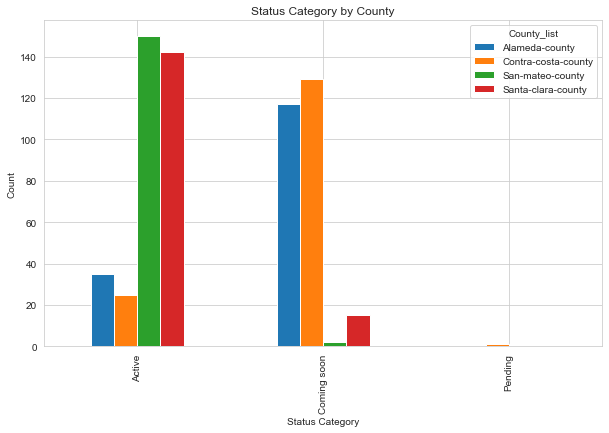

In [28]:
statusDesc.plot.bar(figsize=(10,6))
plt.title('Status Category by County')
plt.xlabel('Status Category')
plt.ylabel('Count')
plt.show()

In [30]:
#Treating missing values in Bed, Bath and Sqft
columnsToTreat = ['Beds_list','Baths_list','Square_Footage_list']
for i in columnsToTreat:
    df[i] = df[i].fillna(df[i].mean())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State_list             616 non-null    object 
 1   County_list            616 non-null    object 
 2   City_list              616 non-null    object 
 3   Street_list            616 non-null    object 
 4   Zipcode_list           616 non-null    object 
 5   Property_Type_list     616 non-null    object 
 6   Status_list            616 non-null    object 
 7   Price_list             569 non-null    float64
 8   Year_Built_list        616 non-null    int64  
 9   Beds_list              616 non-null    float64
 10  Baths_list             616 non-null    float64
 11  Square_Footage_list    616 non-null    float64
 12  School_Rating_list     616 non-null    int64  
 13  Walk_Score_list        616 non-null    int64  
 14  Bike_Score_list        616 non-null    float64
 15  Redfin

In [31]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 615
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State_list             554 non-null    object 
 1   County_list            554 non-null    object 
 2   City_list              554 non-null    object 
 3   Street_list            554 non-null    object 
 4   Zipcode_list           554 non-null    object 
 5   Property_Type_list     554 non-null    object 
 6   Status_list            554 non-null    object 
 7   Price_list             554 non-null    float64
 8   Year_Built_list        554 non-null    int64  
 9   Beds_list              554 non-null    float64
 10  Baths_list             554 non-null    float64
 11  Square_Footage_list    554 non-null    float64
 12  School_Rating_list     554 non-null    int64  
 13  Walk_Score_list        554 non-null    int64  
 14  Bike_Score_list        554 non-null    float64
 15  Redfin

In [33]:
bins = [-np.inf, 2.4, 4.9, 6.9, 8.9, 10]
labels = ['Bad', 'Fair', 'Good', 'Better', 'Excellent']
df['schoolrating_desc'] = pd.cut(df['School_Rating_list'], bins=bins, labels=labels, include_lowest=True).map(lambda x: x if pd.notna(x) else '')


C:\Users\STSC\AppData\Local\Temp\ipykernel_22824\2007287515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['schoolrating_desc'] = pd.cut(df['School_Rating_list'], bins=bins, labels=labels, include_lowest=True).map(lambda x: x if pd.notna(x) else '')


<AxesSubplot:xlabel='County_list'>

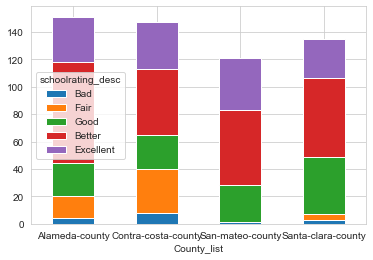

In [34]:
pd.crosstab(df['County_list'],df['schoolrating_desc']).plot(kind="bar", stacked=True, rot=360)

Text(0.5, 1.0, 'Correlation between School Rating and Price')

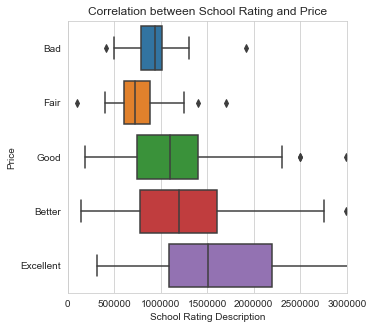

In [35]:

plt.figure(figsize=(5,5))
sns.boxplot(x="Price_list", y="schoolrating_desc", data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.xlim(0, 3000000)
plt.ylabel("Price")
plt.xlabel("School Rating Description")
plt.title("Correlation between School Rating and Price")

In [ ]:
#################################Regression Analysis

In [37]:
DataRegression = df[['Year_Built_list', 'Beds_list', 'Baths_list', 'Square_Footage_list', 'School_Rating_list', 'Redfin_Estimate_list', 'Status_Category']] # Filter out the unwanted variables from the dataframe

In [38]:
DataRegression = pd.get_dummies(DataRegression, drop_first = True) # Create dummy variables

In [40]:
dfTraining, dfTesting = model_selection.train_test_split(DataRegression, test_size=0.3)

# print shapes and means of train and test sets
print(f"XtrainingShape: {dfTraining.iloc[:,:-1].shape} | X_test shape: {dfTesting.iloc[:,:-1].shape}")
print(f"ytrainingMean: {dfTraining['Redfin_Estimate_list'].mean():.2f} | y_test mean: {dfTesting['Redfin_Estimate_list'].mean():.2f}")

# print feature names
features = dfTraining.columns.tolist()[:-1]
print(f"{len(features)} features: {features}")


XtrainingShape: (387, 7) | X_test shape: (167, 7)
ytrainingMean: 1108929.75 | y_test mean: 1183684.98
7 features: ['Year_Built_list', 'Beds_list', 'Baths_list', 'Square_Footage_list', 'School_Rating_list', 'Redfin_Estimate_list', 'Status_Category_Coming soon']


In [41]:
dfTraining.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 264 to 604
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year_Built_list              387 non-null    int64  
 1   Beds_list                    387 non-null    float64
 2   Baths_list                   387 non-null    float64
 3   Square_Footage_list          387 non-null    float64
 4   School_Rating_list           387 non-null    int64  
 5   Redfin_Estimate_list         387 non-null    float64
 6   Status_Category_Coming soon  387 non-null    uint8  
 7   Status_Category_Pending      387 non-null    uint8  
dtypes: float64(4), int64(2), uint8(2)
memory usage: 21.9 KB


In [42]:
# scale X and y variables
scaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dfTS = pd.DataFrame(scaler.fit_transform(dfTraining.drop("Redfin_Estimate_list", axis=1)), 
                             columns=dfTraining.drop("Redfin_Estimate_list", axis=1).columns, 
                             index=dfTraining.index)
dfTS['Redfin_Estimate_list'] = scaler.fit_transform(dfTraining['Redfin_Estimate_list'].values.reshape(-1,1))

# print the first few rows of the scaled data
dfTS.head()


,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Status_Category_Coming soon,Status_Category_Pending,Redfin_Estimate_list
264,1.285714,0.0,1.5,0.056888,0.0,0.0,0.0,0.740442
248,1.085714,2.0,2.0,2.398215,-0.5,0.0,0.0,0.897406
480,0.828571,2.0,1.0,1.160067,-0.5,1.0,0.0,-0.240809
584,-0.200000,0.0,0.0,-0.083659,-2.0,1.0,0.0,-1.115790
38,-1.400000,0.0,-1.0,0.035694,-2.0,1.0,0.0,-0.419922


In [47]:
# scale X and y variables
scaler = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dfTS = pd.DataFrame(scaler.fit_transform(dfTesting.drop("Redfin_Estimate_list", axis=1)), 
                            columns=dfTesting.drop("Redfin_Estimate_list", axis=1).columns, 
                            index=dfTesting.index)
dfTS['Redfin_Estimate_list'] = scaler.fit_transform(dfTesting['Redfin_Estimate_list'].values.reshape(-1,1))

# print the first few rows of the scaled data
dfTS.head()


,Year_Built_list,Beds_list,Baths_list,Square_Footage_list,School_Rating_list,Status_Category_Coming soon,Status_Category_Pending,Redfin_Estimate_list
391,-0.142857,1.0,0.5,0.140225,0.0,0.0,0.0,0.045511
446,0.000000,-1.0,0.0,-0.684749,0.0,0.0,0.0,-0.380671
271,0.514286,1.0,1.0,0.692938,0.0,0.0,0.0,0.719662
169,-0.114286,0.0,0.0,-0.181167,-1.5,0.0,0.0,0.211100
412,0.228571,-1.0,0.0,-0.350051,0.5,0.0,0.0,-1.230965


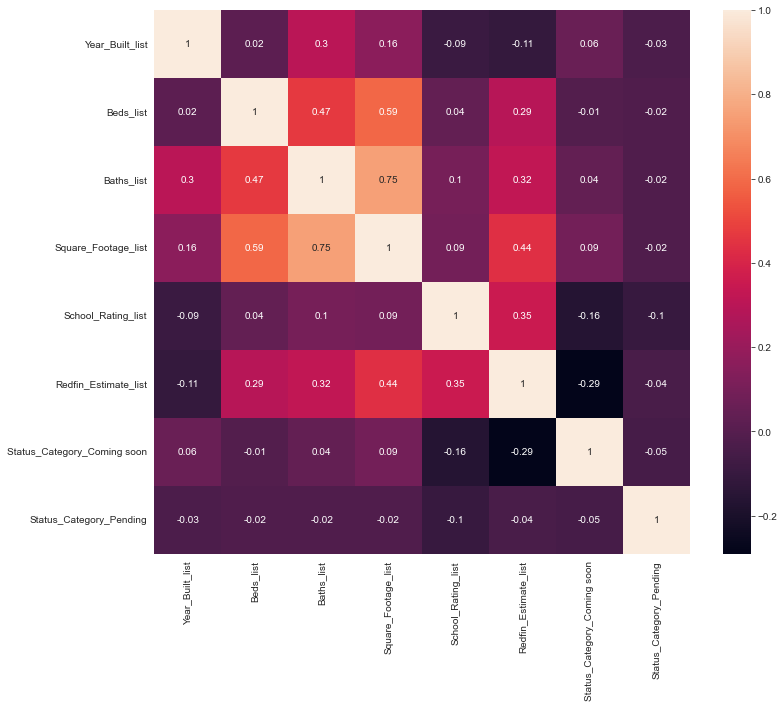

In [48]:
# plot the correlation matrix using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(dfTraining.corr().round(2), annot=True)
plt.show()


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the columns to use in the model
XColumns = ['Year_Built_list', 'Beds_list', 'Baths_list', 'Square_Footage_list', 'School_Rating_list', 'Status_Category_Coming soon', 'Status_Category_Pending']

# Get the training and testing data
xTraining1 = dfTS[XColumns].values
yTraining1 = dfTS["Redfin_Estimate_list"].values
xTesting1 = dfTS[XColumns].values
yTesting1 = dfTS["Redfin_Estimate_list"].values

# Fit the linear regression model to the training data
reg = LinearRegression().fit(xTraining1, yTraining1)

# Make predictions on the testing data
yPredicted1 = reg.predict(xTesting1)

# Evaluate the performance of the model
mse = mean_squared_error(yTesting1, yPredicted1)
r2 = r2_score(yTesting1, yPredicted1)

# Print the performance metrics
print('Mean squared error: %.2f' % mse)
print('Coefficient of determination (R^2): %.2f' % r2)


Mean squared error: 0.34
Coefficient of determination (R^2): 0.35


In [51]:
from sklearn.ensemble import RandomForestRegressor

# Define the columns to use in the model
XColumns = ['Year_Built_list', 'Beds_list', 'Baths_list', 'Square_Footage_list', 'School_Rating_list', 'Status_Category_Coming soon', 'Status_Category_Pending']

# Get the training and testing data
xTraining1 = dfTS[XColumns].values
yTraining1 = dfTS["Redfin_Estimate_list"].values
xTesting1 = dfTS[XColumns].values
yTesting1 = dfTS["Redfin_Estimate_list"].values

# Fit the random forest regression model to the training data
reg = RandomForestRegressor().fit(xTraining1, yTraining1)

# Make predictions on the testing data
yPredicted1 = reg.predict(xTesting1)

# Evaluate the performance of the model
mse = mean_squared_error(yTesting1, yPredicted1)
r2 = r2_score(yTesting1, yPredicted1)

# Print the performance metrics
print('Mean squared error: %.2f' % mse)
print('Coefficient of determination (R^2): %.2f' % r2)


Mean squared error: 0.05
Coefficient of determination (R^2): 0.90


<AxesSubplot:xlabel='Price_list', ylabel='Count'>

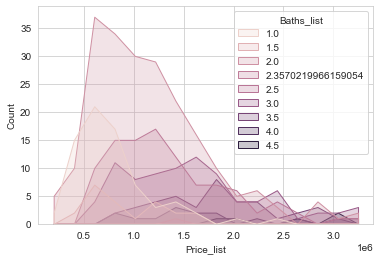

In [52]:
import seaborn as sns

sns.histplot(data=df, x="Price_list", hue="Baths_list", element="poly")


C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

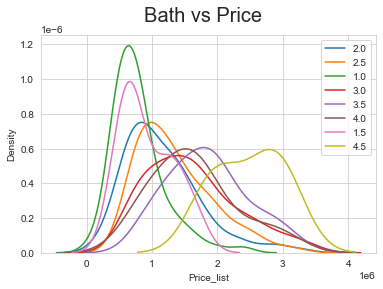

In [53]:
cat, num = "Baths_list", "Price_list"
fig, ax = plt.subplots()
fig.suptitle("Bath vs Price", fontsize=20)

for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label= i, ax=ax)
plt.legend()
ax.grid(True)

In [54]:
bins= [0,2,3,4,5]
labels = ['1','2','3','4']
df['bath_group'] = pd.cut(df['Baths_list'], bins=bins, labels=labels, right=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 615
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   State_list             554 non-null    object  
 1   County_list            554 non-null    object  
 2   City_list              554 non-null    object  
 3   Street_list            554 non-null    object  
 4   Zipcode_list           554 non-null    object  
 5   Property_Type_list     554 non-null    object  
 6   Status_list            554 non-null    object  
 7   Price_list             554 non-null    float64 
 8   Year_Built_list        554 non-null    int64   
 9   Beds_list              554 non-null    float64 
 10  Baths_list             554 non-null    float64 
 11  Square_Footage_list    554 non-null    float64 
 12  School_Rating_list     554 non-null    int64   
 13  Walk_Score_list        554 non-null    int64   
 14  Bike_Score_list        554 non-null    flo

C:\Users\STSC\AppData\Local\Temp\ipykernel_22824\4287276557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath_group'] = pd.cut(df['Baths_list'], bins=bins, labels=labels, right=False)


<AxesSubplot:xlabel='Price_list', ylabel='Count'>

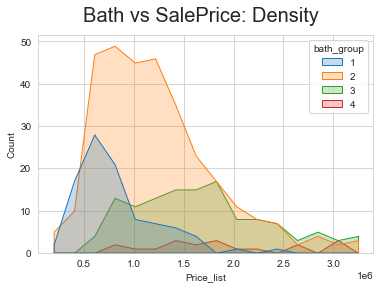

In [55]:
fig, ax = plt.subplots()
fig.suptitle("Bath vs SalePrice: Density", fontsize=20)
sns.histplot(data = df, x = "Price_list", hue = "bath_group", element="poly")

C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

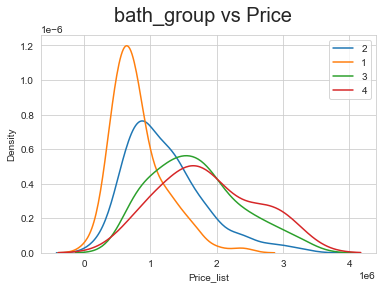

In [56]:
cat, num = "bath_group", "Price_list"
fig, ax = plt.subplots()
fig.suptitle("bath_group vs Price", fontsize=20)

for i in df[cat].unique():
    sns.distplot(df[df[cat]==i][num], hist=False, label= i, ax=ax)
plt.legend()
ax.grid(True)

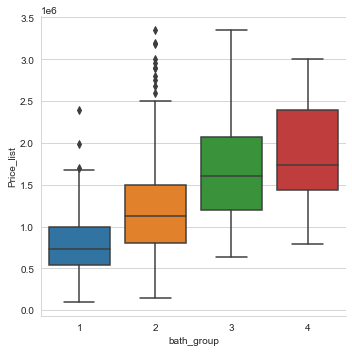

In [57]:
sns.catplot(x=cat, y=num, data=df, kind="box")
plt.show()

In [58]:
cat, num = "Baths_list", "Price_list"
model = smf.ols(num+' ~ '+cat, data=df).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)
